In [1]:
%matplotlib inline 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import L2, L1, L1L2
from tensorflow.keras.layers import Input, Reshape, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard

from tensorflow.keras.datasets import mnist

D:\Python\AI\venv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# tf.config.experimental.set_memory_growth(tf.config.list_physical_devices()[1],True)

In [4]:
((train_attributes, train_classes), (test_attributes, test_classes)) = mnist.load_data()

In [5]:
train_attributes.shape

(60000, 28, 28)

In [6]:
test_attributes.shape

(10000, 28, 28)

In [7]:
input_shape = train_attributes[0].shape
num_classes = len(set(train_classes))

In [8]:
input_shape, num_classes

((28, 28), 10)

In [9]:
# model = Sequential([
#     Input(input_shape),
#     Flatten(),
    
#     Dense(40, kernel_regularizer= L1L2(l1=0.01, l2=0.001), activation="relu"),
#     Dense(30, kernel_regularizer= L1L2(l1=0.0001, l2=0.00001), activation="relu"),
#     Dense(20, activation="relu"),
#     Dense(num_classes, activation="softmax"),
    
# ])

In [10]:
model = Sequential([
    Input(input_shape),
    Flatten(),
    
    Dense(40, activation="relu"),
    Dropout(0.04),
    Dense(30, activation="relu"),
    Dropout(0.05),
    Dense(20, activation="relu"),
    Dropout(0.02),
    Dense(num_classes, activation="softmax"),
    
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 40)                31400     
                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 30)                1230      
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                620       
                                                                 
 dropout_2 (Dropout)         (None, 20)                0

In [14]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam")

In [17]:
model.fit(
    train_attributes, 
    train_classes, 
    validation_split=0.1, 
    epochs = 20,
    callbacks= [TensorBoard(update_freq=10)]
)

Epoch 1/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1176 - val_loss: 0.1313
Epoch 2/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1131 - val_loss: 0.1264
Epoch 3/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.1151 - val_loss: 0.1352
Epoch 4/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1123 - val_loss: 0.1463
Epoch 5/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1115 - val_loss: 0.1421
Epoch 6/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1102 - val_loss: 0.1507
Epoch 7/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.1090 - val_loss: 0.1409
Epoch 8/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1101 - val_loss: 0.1375
Epoch 9/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1108 - val_loss: 0.1458
Epoch 10/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.112

In [22]:
new_model = Sequential([
    Input(shape = (20,)),
    Dense(5),
    Dense(10),
    Dense(2)
])

(array([18., 22., 13., 25., 22.]),
 array([-0.4876723 , -0.29514313, -0.10261394,  0.08991523,  0.28244442,
         0.4749736 ], dtype=float32),
 <BarContainer object of 5 artists>)

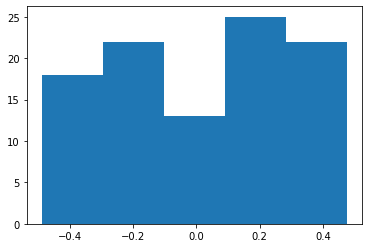

In [29]:
plt.hist(new_model.layers[0].kernel.numpy().ravel(),bins = "fd")